In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader

# from torchsummary import summary

import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.utils.data as data

from resnet import BasicBlock, ResNet, Bottleneck
from train_eval_util import train, evaluate, calculate_accuracy, epoch_time
from getCIFAR10 import train_data, valid_data, test_data

import time

In [17]:
if torch.cuda.is_available():
    device = torch.device('cuda')
elif torch.backends.mps.is_available():
    device = torch.device('mps')  
else:
    device = torch.device('cpu')

print(f"Selected device: {device}")

Selected device: cuda


In [18]:
BATCH_SIZE = 128

train_iterator = DataLoader(train_data, batch_size= BATCH_SIZE, shuffle=True)
valid_iterator =  DataLoader(valid_data, batch_size=BATCH_SIZE, shuffle=False)
test_iterator =  DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True)

In [19]:
def total_layers(model):
    return sum([1 for m in model.modules() if isinstance(m, nn.Conv2d)]) - 2

def total_params(model):
     return sum(p.numel() for p in model.parameters() if p.requires_grad)

# resnet 18

In [20]:
model = ResNet(BasicBlock, [2, 2, 2, 2]).to(device)

print(f"Total number of layers: {total_layers(model)}")
print(f"Total number of parameters: {total_params(model)}")

Total number of layers: 18
Total number of parameters: 11173962


In [21]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)

In [22]:
num_epochs = 30
train_acc_history = []
train_loss_history = []
valid_acc_history = []
valid_loss_history = []

for epoch in range(num_epochs):

    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion, device)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion, device)
        
    end_time = time.time()

        
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

    train_acc_history.append(train_acc)
    train_loss_history.append( train_loss)
    valid_acc_history.append(valid_acc)
    valid_loss_history.append(valid_loss)

Epoch: 01 | Epoch Time: 0m 36s
	Train Loss: 1.434 | Train Acc: 47.28%
	 Val. Loss: 1.349 |  Val. Acc: 55.96%


KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (150,) and (35,)

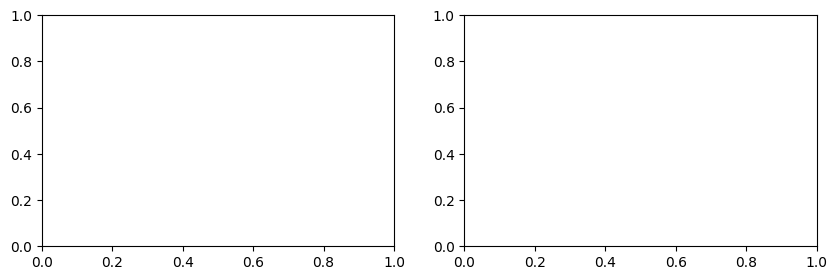

In [ ]:
import matplotlib.pyplot as plt 

fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

ax1.plot(range(num_epochs), train_loss_history, '--r')
ax1.plot(range(num_epochs), valid_loss_history, '-g')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend(['train', 'valid'])

ax2.plot(range(num_epochs), train_acc_history, '--r')
ax2.plot(range(num_epochs), valid_acc_history, '-g')
ax2.set_xlabel('Epochs')
ax2.set_xlabel('Accuracy')
ax1.legend(['train', 'valid'])